In [4]:

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling as pp
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE


C:\Users\rmadh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
%cd "C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\2. Walmart Store Sales Forecasting\data"

C:\Users\rmadh\Dropbox\Analytix Labs\Python\Assigments\2. Walmart Store Sales Forecasting\data


# Input the stores and train data

In [6]:
stores=pd.read_csv("stores.csv")

In [7]:
train_a=pd.read_csv("train.csv")

In [8]:
features=pd.read_csv("features.csv")

In [9]:
test_a=pd.read_csv("test.csv")

# Merge the data sets based on the common columns

In [10]:
train_1=pd.merge(left=train_a,right=stores,how="inner",on="Store")
train=pd.merge(left=train_1,right=features,how="inner")

In [11]:
train.shape

(421570, 16)

In [12]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [14]:
test_1=pd.merge(left=test_a,right=stores,how="inner",on="Store")
test=pd.merge(left=test_1,right=features,how="inner")

In [15]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [16]:
test.shape

(115064, 15)

# Training data analysis

In [17]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
<class 'pandas.core.fram

# Converting the boolean to a numerical value

In [18]:
type_mapping = {False: 0, True: 1}

train['IsHoliday'] = train['IsHoliday'].map(type_mapping)

In [19]:
test['IsHoliday'] = test['IsHoliday'].map(type_mapping)

In [20]:
train_num=train.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns

In [21]:
train_num

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [22]:
train_cat=train.select_dtypes(include=['object']).columns

In [23]:
train_cat

Index(['Date', 'Type'], dtype='object')

In [24]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train[train_num].apply(lambda x : var_summary(x))
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
IsHoliday,421570.0,0.0,2.966100e+04,0.070358,0.00000,0.255750,6.540827e-02,0.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000


In [25]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum()], 
                  index=['N', 'NMISS'])

cat_summary=train[train_cat].apply(lambda x: cat_summary(x))
cat_summary.T

,N,NMISS
Date,421570,0
Type,421570,0


In [26]:
#pp.ProfileReport(train)

# Correlation

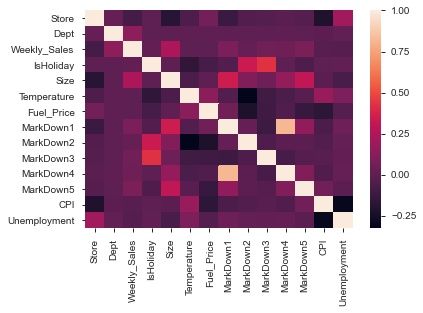

In [27]:
sns.heatmap(train.corr())

# Date Formatting

In [28]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [29]:
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

# Data Mapping

In [30]:
train["Type"]=np.where(train["Type"]=="A",1,np.where(train["Type"]=="B",2,np.where(train["Type"]=="C",3,0)))

In [31]:
test["Type"]=np.where(test["Type"]=="A",1,np.where(test["Type"]=="B",2,np.where(test["Type"]=="C",3,0)))

In [32]:
train["IsHoliday"]=np.where(train["IsHoliday"]==True,1,0)

In [33]:
test["IsHoliday"]=np.where(test["IsHoliday"]==True,1,0)

# Missing Value Treatment

In [34]:
Missing_values=pd.DataFrame(train.isnull().sum())

In [35]:
Missing_values.rename(columns={0:"Missing_values"})

,Missing_values
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [36]:
for i in train:
        train[i]=train[i].fillna(0)


In [37]:
for i in test:
        test[i]=test[i].fillna(0)

# Outlier Treatment

In [38]:
for i in ["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]:
    train[i]= train[i].clip(upper=train[i].quantile(0.99)) 
    train[i]= train[i].clip(lower=train[i].quantile(0.01)) 
    
    

# Feature ranking using RFE

In [39]:
dtr = DecisionTreeRegressor()
rfe = RFE(dtr, 3)
train_target=train.drop(["Weekly_Sales","Date"],axis=1)

In [40]:
rfe = rfe.fit(train_target, train.Weekly_Sales)
select_features=pd.DataFrame({"Features":list(train_target.columns),"Ranking":rfe.ranking_})

In [41]:
select_features.sort_values(by="Ranking")

,Features,Ranking
1,Dept,1
12,CPI,1
4,Size,1
0,Store,2
15,Date_month,3
17,Date_day,4
3,Type,5
13,Unemployment,6
5,Temperature,7
6,Fuel_Price,8


# Adding the special holidays

In [42]:
train["New_Holiday"] = np.where((train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2011,2,11)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2013,2,8)) | (train["Date"]==datetime(2010,9,10)) | (train["Date"]==datetime(2011,9,11)) | (train["Date"]==datetime(2012,9,7)) | (train["Date"]==datetime(2013,9,6)) | (train["Date"]==datetime(2010,11,26)) | (train["Date"]==datetime(2011,11,25)) | (train["Date"]==datetime(2012,11,23)) | (train["Date"]==datetime(2013,11,29)) | (train["Date"]==datetime(2012,11,23)) |(train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2011,2,11)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2013,2,8)) | (train["Date"]==datetime(2010,9,10)) | (train["Date"]==datetime(2011,9,11)) | (train["Date"]==datetime(2012,9,7)) | (train["Date"]==datetime(2013,9,6)) | (train["Date"]==datetime(2010,11,26)) | (train["Date"]==datetime(2011,11,25)) | (train["Date"]==datetime(2012,11,23)) | (train["Date"]==datetime(2013,11,29)) | (train["Date"]==datetime(2012,11,23)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2011,2,11)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2013,2,8)) | (train["Date"]==datetime(2010,9,10)) | (train["Date"]==datetime(2011,9,11)) | (train["Date"]==datetime(2012,9,7)) | (train["Date"]==datetime(2013,9,6)) | (train["Date"]==datetime(2010,11,26)) | (train["Date"]==datetime(2011,11,25)) | (train["Date"]==datetime(2012,11,23)) | (train["Date"]==datetime(2013,11,29)) | (train["Date"]==datetime(2012,11,23)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2011,2,11)) | (train["Date"]==datetime(2012,2,10)) | (train["Date"]==datetime(2013,2,8)) | (train["Date"]==datetime(2010,9,10)) | (train["Date"]==datetime(2011,9,11)) | (train["Date"]==datetime(2012,9,7)) | (train["Date"]==datetime(2013,9,6)) | (train["Date"]==datetime(2010,11,26)) | (train["Date"]==datetime(2011,11,25)) | (train["Date"]==datetime(2012,11,23)),1,0)
test["New_Holiday"] = np.where((test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2011,2,11)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2013,2,8)) | (test["Date"]==datetime(2010,9,10)) | (test["Date"]==datetime(2011,9,11)) | (test["Date"]==datetime(2012,9,7)) | (test["Date"]==datetime(2013,9,6)) | (test["Date"]==datetime(2010,11,26)) | (test["Date"]==datetime(2011,11,25)) | (test["Date"]==datetime(2012,11,23)) | (test["Date"]==datetime(2013,11,29)) | (test["Date"]==datetime(2012,11,23)) |(test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2011,2,11)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2013,2,8)) | (test["Date"]==datetime(2010,9,10)) | (test["Date"]==datetime(2011,9,11)) | (test["Date"]==datetime(2012,9,7)) | (test["Date"]==datetime(2013,9,6)) | (test["Date"]==datetime(2010,11,26)) | (test["Date"]==datetime(2011,11,25)) | (test["Date"]==datetime(2012,11,23)) | (test["Date"]==datetime(2013,11,29)) | (test["Date"]==datetime(2012,11,23)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2011,2,11)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2013,2,8)) | (test["Date"]==datetime(2010,9,10)) | (test["Date"]==datetime(2011,9,11)) | (test["Date"]==datetime(2012,9,7)) | (test["Date"]==datetime(2013,9,6)) | (test["Date"]==datetime(2010,11,26)) | (test["Date"]==datetime(2011,11,25)) | (test["Date"]==datetime(2012,11,23)) | (test["Date"]==datetime(2013,11,29)) | (test["Date"]==datetime(2012,11,23)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2011,2,11)) | (test["Date"]==datetime(2012,2,10)) | (test["Date"]==datetime(2013,2,8)) | (test["Date"]==datetime(2010,9,10)) | (test["Date"]==datetime(2011,9,11)) | (test["Date"]==datetime(2012,9,7)) | (test["Date"]==datetime(2013,9,6)) | (test["Date"]==datetime(2010,11,26)) | (test["Date"]==datetime(2011,11,25)) | (test["Date"]==datetime(2012,11,23)),1,0)

# Merging the extra holidays and special holidays

In [43]:
train["IsHoliday"]= np.where(((train["IsHoliday"]==1) | (train["New_Holiday"]==1)),1,0)
test["IsHoliday"]= np.where(((test["IsHoliday"]==1) | (test["New_Holiday"]==1)),1,0)

# Dropping the Special holidays variable

In [44]:
#train.drop(columns="New_Holiday",inplace=True)
test.drop(columns="New_Holiday",inplace=True)

# Model Building

In [57]:
train_x=train.drop(columns=["Weekly_Sales","Date","New_Holiday"])
train_y=train["Weekly_Sales"]
test_x=test.drop(columns=["Date"])
train_x.shape, train_y.shape,test_x.shape

((421570, 18), (421570,), (115064, 18))

# Linear Regression

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [59]:
import statsmodels as sm

In [60]:
features = "+".join(train.columns.difference(["Weekly_Sales","Date","New_Holiday"]))
y, X = dmatrices('Weekly_Sales ~' + features,train, return_type='dataframe')

In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\rmadh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [62]:
vif.sort_values(by="VIF Factor")

,VIF Factor,features
0,0.000000,Intercept
3,0.000000,Date_dayofweek
6,1.000680,Dept
2,1.036906,Date_day
8,1.115445,IsHoliday
15,1.133982,Store
10,1.223608,MarkDown2
11,1.300951,MarkDown3
18,1.309417,Unemployment
16,1.332414,Temperature


In [63]:
linreg = LinearRegression()
linreg.fit( train_x, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred_t = linreg.predict(train_x)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print (linreg.score(train_x, train_y)*100)

9.071264493150732


# Decision Tree

In [65]:
dtr=DecisionTreeRegressor()
dtr.fit(train_x, train_y)
print (dtr.score(train_x, train_y) * 100)

100.0


In [66]:
y_pred_dt= dtr.predict(test_x)

In [72]:
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_dt
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
